In [4]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/SpectralClustering聚类(2到7)结果(3方非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,0.0,0.002163,-0.000748,-0.000416,0.000652,0.000708,-0.0900,-0.013443,-0.011354,-0.016001,...,0.045685,-0.040000,-0.000468,-0.028797,-0.083922,-0.020012,-0.024931,-0.154337,-0.000152,-0.017778
1,0.0,-0.008653,0.000269,-0.001666,0.000932,-0.000892,0.0784,-0.003361,-0.008130,-0.041103,...,0.007051,-0.055561,-0.000069,-0.058770,-0.001937,0.013706,0.000000,-0.034490,-0.000152,0.000000
2,0.0,0.002163,-0.000748,0.001157,-0.000416,-0.000993,0.0256,-0.013443,-0.017200,-0.047669,...,0.002855,-0.069847,-0.000003,-0.004444,-0.000038,0.002879,-0.002770,0.000319,0.005487,-0.000278
3,0.0,-0.019470,0.000120,0.000046,0.000073,-0.000603,0.1936,-0.023157,-0.026874,-0.063130,...,-0.075520,-0.085765,0.000025,-0.123563,0.371455,-0.000024,-0.011080,-0.047462,-0.003086,-0.000278
4,0.0,0.000541,0.000269,0.000416,0.000293,0.000402,0.0016,-0.002573,-0.000067,0.006326,...,-0.028203,-0.094337,-0.000044,0.021157,0.018478,0.001970,0.000000,0.003265,0.000038,-0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.0,-0.013521,0.000269,0.006664,-0.000521,-0.000037,0.0256,0.025415,0.068799,0.100554,...,0.023309,-0.022500,-0.000468,0.000918,0.019398,-0.029149,-0.011080,-0.006173,0.009755,0.046944
4047,0.0,-0.077880,-0.001077,0.007821,-0.000814,-0.000743,-0.0016,-0.064325,-0.035542,-0.007810,...,0.023309,-0.000204,0.000025,-0.001322,-0.001746,-0.001523,-0.044321,-0.025829,-0.007468,0.090000
4048,0.0,-0.002163,-0.000748,0.005600,0.000000,-0.000732,-0.0256,0.064325,0.038699,0.000027,...,-0.000233,0.094337,0.051207,-0.001322,-0.022626,0.011517,0.069252,0.014745,-0.000152,0.013611
4049,0.0,-0.091401,-0.002424,-0.001666,-0.000293,-0.000022,-0.0036,-0.001313,-0.000269,-0.000050,...,0.014918,0.000204,-0.000100,-0.002975,-0.006525,-0.000571,-0.002770,0.028176,-0.039018,-0.040000


In [5]:
#存放设置不同簇数时的SSE值
sse_list =[]
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

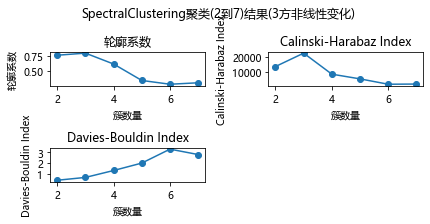

In [6]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('SpectralClustering聚类(2到7)结果(3方非线性变化)')
plt.tight_layout()
plt.show()